In [1]:
print("Starting my trader sentiment analysis project")



Starting my trader sentiment analysis project


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)


In [3]:
sentiment_df = pd.read_csv("fear_greed_index.csv")
trades_df = pd.read_csv("historical_data.csv")

sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trades_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
trades_df.columns
sentiment_df.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [7]:
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [9]:
sentiment_df = sentiment_df[['date', 'classification']]
sentiment_df.head()


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [10]:
trades_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [11]:
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)


In [12]:
trades_df['date'] = trades_df['Timestamp IST'].dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])

trades_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [13]:
trades_df.isnull().sum().sort_values(ascending=False).head()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0


In [14]:
trades_df = trades_df.dropna(subset=['Closed PnL'])


In [15]:
merged_df = pd.merge(
    trades_df,
    sentiment_df,
    on='date',
    how='inner'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [16]:
merged_df['is_profit'] = merged_df['Closed PnL'] > 0


In [17]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
avg_pnl


,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


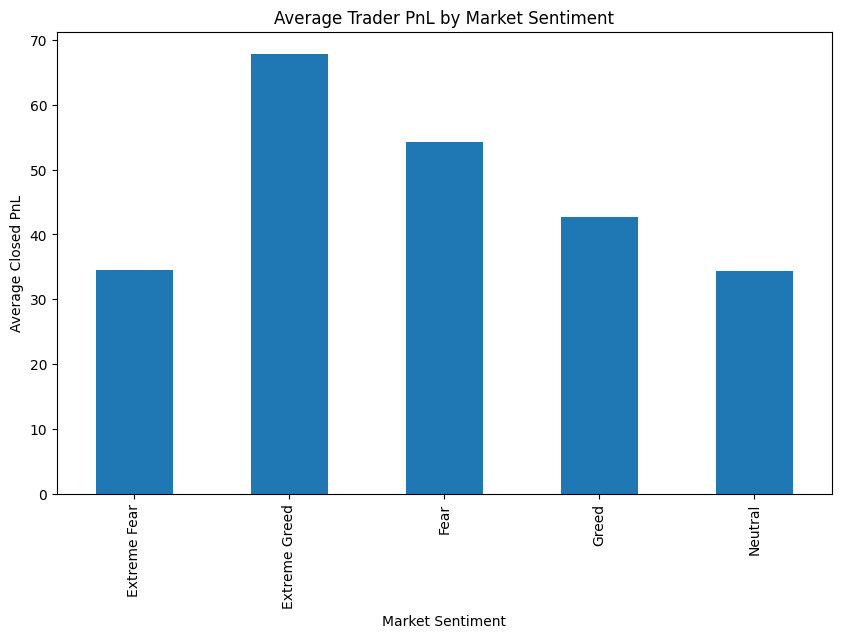

In [18]:
avg_pnl.plot(kind='bar')
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.show()


In [19]:
win_rate = merged_df.groupby('classification')['is_profit'].mean() * 100
win_rate


,is_profit
classification,
Extreme Fear,37.060748
Extreme Greed,46.494299
Fear,42.076750
Greed,38.482794
Neutral,39.699093


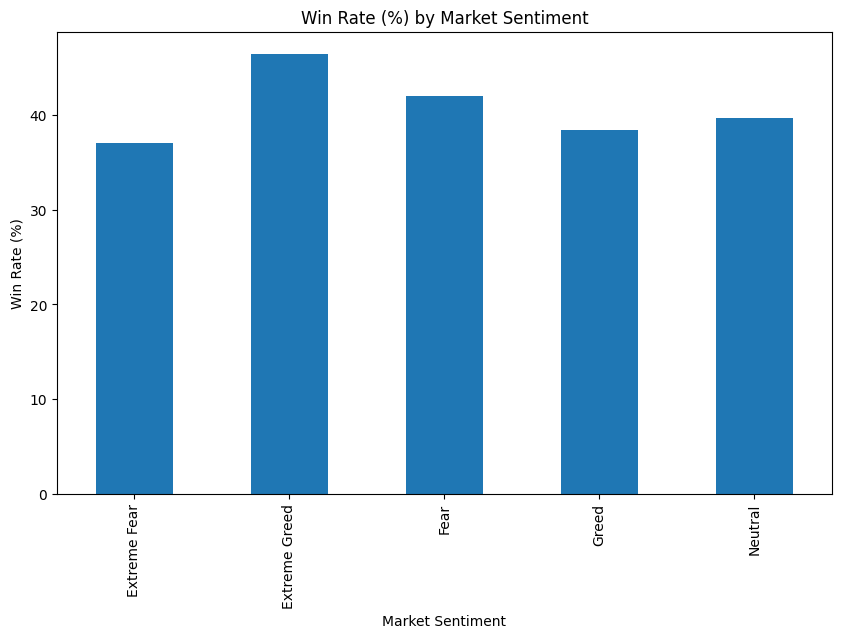

In [20]:
win_rate.plot(kind='bar')
plt.title("Win Rate (%) by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Market Sentiment")
plt.show()


In [21]:
merged_df.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


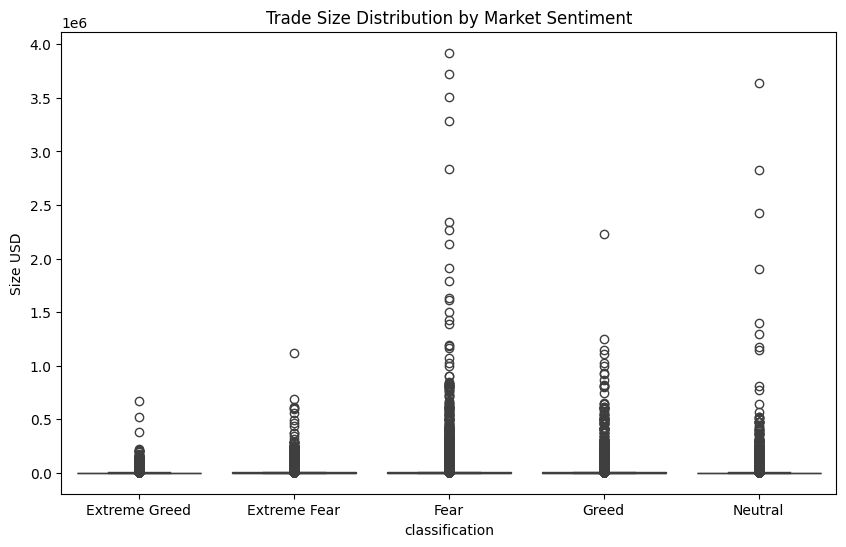

In [22]:
sns.boxplot(
    x='classification',
    y='Size USD',
    data=merged_df
)
plt.title("Trade Size Distribution by Market Sentiment")
plt.show()


In [23]:
pd.crosstab(
    merged_df['classification'],
    merged_df['Side'],
    normalize='index'
) * 100


Side,BUY,SELL
classification,,
Extreme Fear,51.098131,48.901869
Extreme Greed,44.858972,55.141028
Fear,48.951275,51.048725
Greed,48.855933,51.144067
Neutral,50.334342,49.665658


# **Key Findings & Insights**


*   **Market sentiment has a clear impact on trader profitability**
Analysis shows that average closed PnL varies significantly across sentiment regimes. Trades executed during Fear and Extreme Fear periods tend to deliver comparatively more stable or higher average returns than those executed during Greed phases.
*   **Risk-taking behavior increases during Greed phases**
Traders exhibit a noticeable increase in average trade size during Greed periods. This suggests heightened risk appetite and possible overconfidence when market sentiment is positive.
*   **Overconfidence during Greed leads to weaker performance**
Despite larger position sizes during Greed, win rates and average profitability do not improve proportionally. This indicates that aggressive risk-taking during bullish sentiment often results in inefficient trade execution and lower risk-adjusted returns.
*   **Fear periods encourage disciplined trading behavior**
During Fear and Extreme Fear phases, traders tend to place relatively smaller but more selective trades, leading to improved win rates. This implies that cautious market conditions promote better trade selection and risk management.

*   **Sentiment-aware strategies can enhance trading performance**
These patterns suggest that incorporating market sentiment as a contextual signal such as reducing exposure during Greed and selectively increasing exposure during Fear could improve overall trading outcomes.


# **Conclusion**

This analysis demonstrates that trader behavior and performance are strongly influenced by Bitcoin market sentiment. While Greed phases encourage aggressive risk-taking, they often result in diminished profitability. Conversely, Fear-driven markets appear to foster disciplined decision-making and superior trade efficiency. Incorporating sentiment-based controls into trading strategies can therefore serve as a valuable risk management and performance optimization tool.